# Ensamble Learning

Dataset Generation

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

def generate_moons_dataset(n_samples=100, noise=0.1, test_size=0.2):
    '''Generates a synthetic dataset of two interleaving half circles (moons).'''
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def plotData(X, y, cmap=plt.cm.coolwarm, edgecolors='k'):
    '''Plots the dataset.'''
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors=edgecolors)

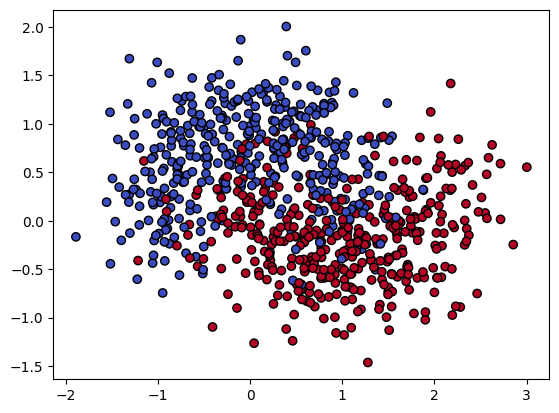

In [87]:
X_train, X_test, y_train, y_test = generate_moons_dataset(n_samples=1000, noise=0.4)
plotData(X_train, y_train)

Hard Voting

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()

voting_clf = VotingClassifier(estimators=[
    ('log_clf', log_clf),
    ('rf_clf', rf_clf),
    ('svc_clf', svc_clf)
    ], 
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression()),
                             ('rf_clf', RandomForestClassifier()),
                             ('svc_clf', SVC())])

In [89]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rf_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__} accuracy: {accuracy:.5f}")

LogisticRegression accuracy: 0.82000
RandomForestClassifier accuracy: 0.85500
SVC accuracy: 0.85500
VotingClassifier accuracy: 0.86000


In [90]:
# NOTE: The Ensamble classifier may or may not perform better than individual classifiers

Soft voting (Gives more weight to higher confidence predictions)

In [91]:
log_clf_2 = LogisticRegression()
rf_clf_2 = RandomForestClassifier()
svc_clf_2 = SVC(probability=True)
# Using 'probability=True' for SVC to enable soft voting
voting_clf_2 = VotingClassifier(estimators=[
    ('log_clf', log_clf_2),
    ('rf_clf', rf_clf_2),
    ('svc_clf', svc_clf_2)
    ], 
    voting='soft')

for clf in (log_clf_2, rf_clf_2, svc_clf_2, voting_clf_2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__} (soft voting) accuracy: {accuracy:.5f}")

LogisticRegression (soft voting) accuracy: 0.82000
RandomForestClassifier (soft voting) accuracy: 0.84000
SVC (soft voting) accuracy: 0.85500
VotingClassifier (soft voting) accuracy: 0.86500


# Bagging and Pasting

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [93]:
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

In [94]:
# Training a single Decision Tree for comparison
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [95]:
print(f"BaggingClassifier accuracy: {accuracy_bagging:.3f}")
print(f"DecisionTreeClassifier accuracy: {accuracy_tree:.3f}")

BaggingClassifier accuracy: 0.855
DecisionTreeClassifier accuracy: 0.775


In [96]:
def plot_decision_boundary(clf, X, y, ax=None):
    X_plot = np.linspace(-1.5, 2.5, 1000)
    X1, X2 = np.meshgrid(X_plot, X_plot)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    y_pred = clf.predict(X_grid)
    y_pred = y_pred.reshape(X1.shape)
    plotData(X, y, cmap=plt.cm.coolwarm)
    if ax is None:
        ax = plt.gca()
    ax.contourf(X1, X2, y_pred, alpha=0.3, cmap=plt.cm.coolwarm)



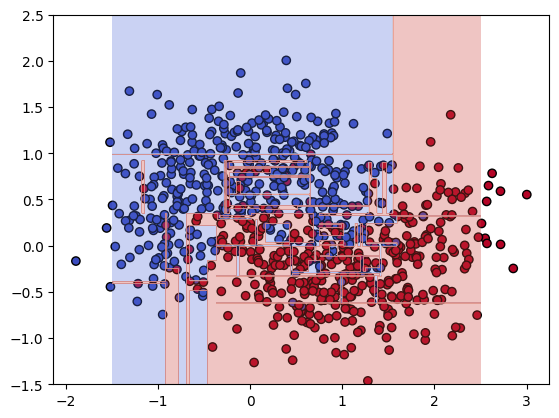

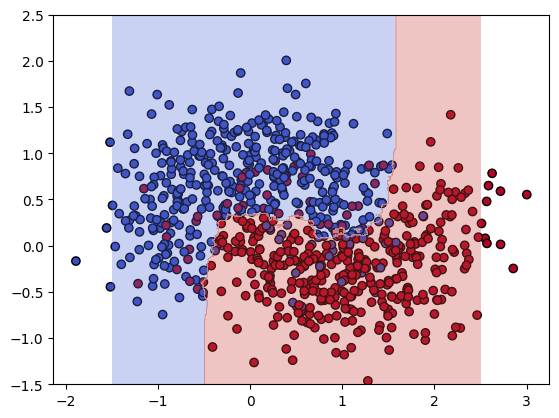

In [97]:
plot_decision_boundary(tree_clf, X_train, y_train)
plt.show()
plot_decision_boundary(bagging_clf, X_train, y_train)
plt.show()


Out Of Bag Evaluation

In [98]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=100, n_jobs=-1, oob_score=True)

In [99]:
print(f"OOB Score for the Bagging Classifier: {bag_clf.oob_score_}")

# Accuracy after testing
bag_accuracy = accuracy_score(y_test, bag_clf.predict(X_test))
print(f"Accuracy of the Bagging Classifier on test set: {bag_accuracy}")

OOB Score for the Bagging Classifier: 0.85375
Accuracy of the Bagging Classifier on test set: 0.855


# Random Forest Classifiers

In [100]:
forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, oob_score=True)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       oob_score=True)

In [101]:
y_pred_forest = forest_clf.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)

In [102]:
print(f"Accuracy of the Random Forest: {forest_accuracy}")
print(f"OOB Score for the Random Forest: {forest_clf.oob_score_}")

Accuracy of the Random Forest: 0.855
OOB Score for the Random Forest: 0.84625


In [103]:
# Using Extra Trees for better randomization
from sklearn.ensemble import ExtraTreesClassifier

etree_clf = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_leaf_nodes=16, bootstrap=True, oob_score=True)
etree_clf.fit(X_train, y_train)
etree_accuracy = accuracy_score(y_test, etree_clf.predict(X_test))

In [104]:
print(f"Accuracy of Exteme Random Tree Ensambles: {etree_accuracy}")
print(etree_clf.oob_score_)

Accuracy of Exteme Random Tree Ensambles: 0.845
0.85125


Feature Importance... IRIS DATASET

In [105]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.08507793415712815
sepal width (cm) 0.021668631715148507
petal length (cm) 0.4523046041729248
petal width (cm) 0.44094882995479845


# Boosting

Ada-Boost (Adaptive Boosting)

In [106]:
# sklearn uses SAMME (Stagewise Additive Modelling using a Multi-class Exponential loss function) for the purpose of implementing Ada-Boost. 
# (If the predictor has a predict_proba function, it uses SAMME.R which is a little more accurate.)

In [107]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [108]:
ada_accuracy = accuracy_score(y_test, ada_clf.predict(X_test))
print(f"Ada-Boost algorithm accuracy: {ada_accuracy}")

Ada-Boost algorithm accuracy: 0.85


Building a little gradient boost using tree regressors

Gradient Boosting (Manual)

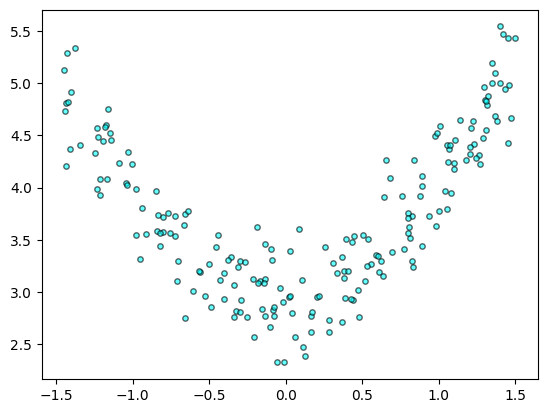

In [190]:
X = 3*(np.random.rand(200, 1) - 0.5)
X.reshape(-1, 1)
y =  X**2 + 3 + np.random.randn(200, 1) * 0.3
plt.scatter(X, y, s=15, c='cyan', alpha=0.6, edgecolors='k')

In [192]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg3 = DecisionTreeRegressor(max_depth=2)

tree_reg1.fit(X, y)
y_int1 = y - tree_reg1.predict(X).reshape(-1, 1)
tree_reg2.fit(X, y_int1)
y_int2 = y_int1 - tree_reg2.predict(X).reshape(-1, 1)
tree_reg3.fit(X, y_int2)

DecisionTreeRegressor(max_depth=2)

In [193]:
y_pred = sum(tree.predict(X).reshape(-1, 1) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [194]:
from sklearn.metrics import mean_squared_error
print("MS of first tree alone: ", mean_squared_error(y, tree_reg1.predict(X)))
print("MS error for the first two trees combined: ", mean_squared_error(y, (tree_reg1.predict(X).reshape(-1, 1) + tree_reg2.predict(X).reshape(-1, 1))))
print("MS error for the first three trees combined: ", mean_squared_error(y, (tree_reg1.predict(X).reshape(-1, 1) + tree_reg2.predict(X).reshape(-1, 1) + tree_reg3.predict(X).reshape(-1, 1))))

MS of first tree alone:  0.14589444848781033
MS error for the first two trees combined:  0.10356083277460859
MS error for the first three trees combined:  0.08722910857318343


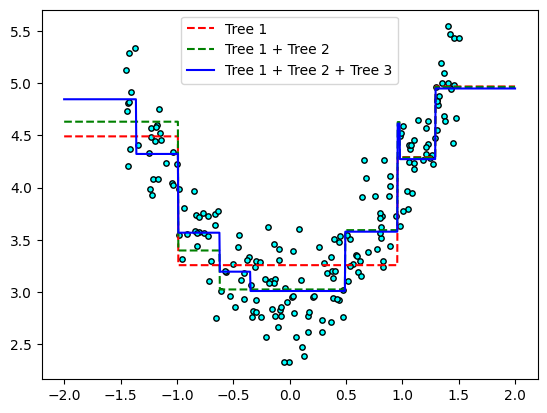

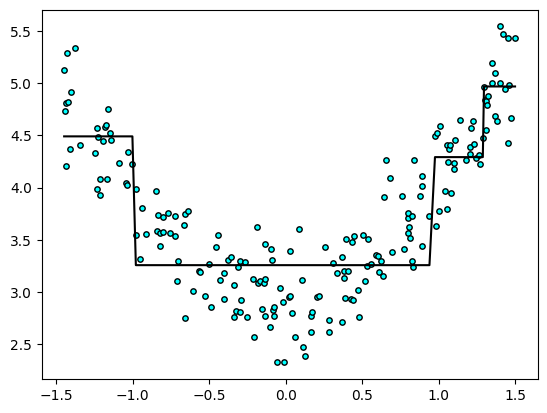

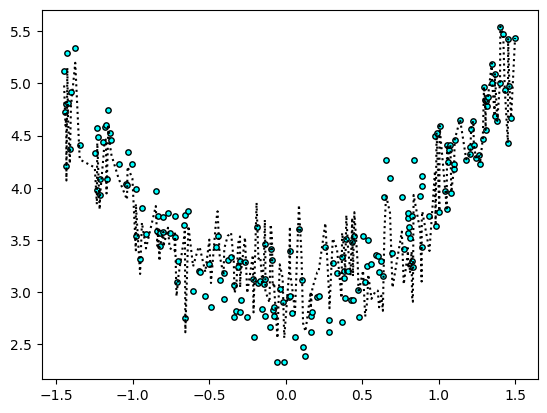

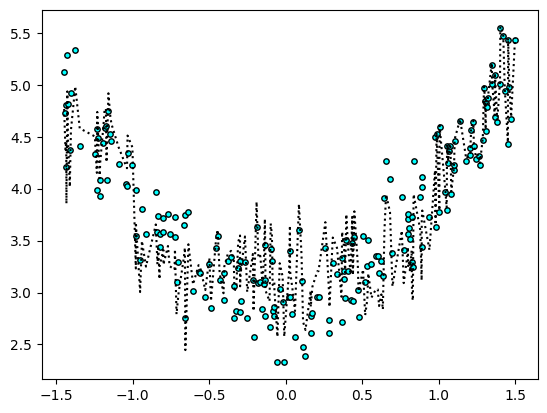

In [210]:
# Plotting decision boundaries
plt.scatter(X[:, 0], y, color='cyan', s=15, edgecolors='k')
X_plot = np.linspace(-2.0, 2.0, 1000).reshape(-1, 1)
plt.plot(X_plot, tree_reg1.predict(X_plot), "r--", label="Tree 1")
plt.plot(X_plot, tree_reg2.predict(X_plot).reshape(-1, 1) + tree_reg1.predict(X_plot).reshape(-1, 1), "g--", label="Tree 1 + Tree 2")
plt.plot(X_plot, tree_reg3.predict(X_plot).reshape(-1, 1) + tree_reg2.predict(X_plot).reshape(-1, 1) + tree_reg1.predict(X_plot).reshape(-1, 1), "b-", label="Tree 1 + Tree 2 + Tree 3")
plt.legend()
plt.show()


data_ = np.c_[X, y]
data_sorted = pd.DataFrame(data_, columns=['X', 'y']).sort_values(by='X')
X_plot_ = data_sorted['X'].values.reshape(-1, 1)
Y_plot_ = data_sorted['y'].values.reshape(-1, 1)

plt.scatter(X_plot_[:, 0], Y_plot_, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, tree_reg1.predict(X_plot_).reshape(-1, 1), "k-", label="Tree 1 Training")
plt.show()
plt.scatter(X_plot_[:, 0], Y_plot_, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, Y_plot_ - tree_reg2.predict(X_plot_).reshape(-1, 1), "k:", label="Tree 3 Training")
plt.show()
plt.scatter(X_plot_[:, 0], Y_plot_, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, Y_plot_ - tree_reg2.predict(X_plot_).reshape(-1, 1) - tree_reg3.predict(X_plot_).reshape(-1, 1), "k:", label="Tree 3 Training")
plt.show()

Gradient Boosting (using sklearn)

In [212]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(
    learning_rate=1, max_depth=2, n_estimators=3
)
gb_reg.fit(X, y.ravel())

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3)

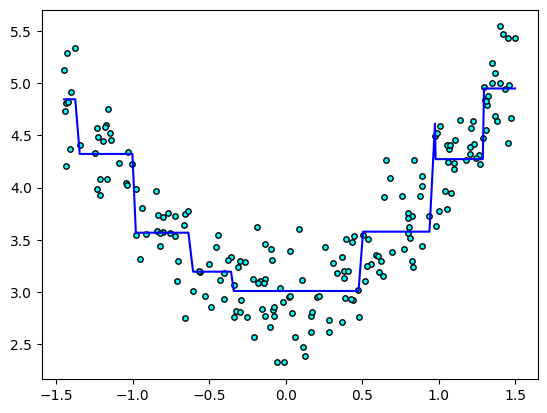

In [215]:
# Plotting decision boundaries
plt.scatter(X, y, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, gb_reg.predict(X_plot_), "b-", label="Gradient Boosting")

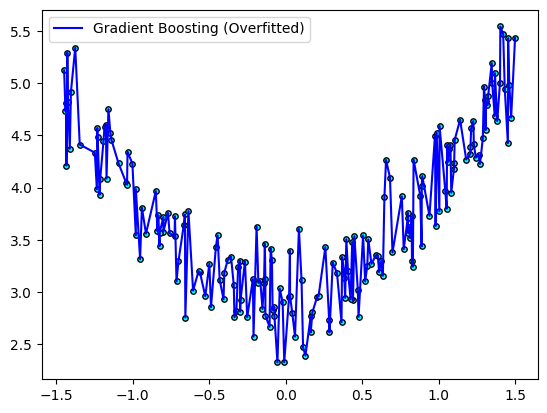

In [223]:
gb_reg_of = GradientBoostingRegressor(
    learning_rate=1, n_estimators=500
)
gb_reg_of.fit(X, y.ravel())
# Plotting decision boundaries
plt.scatter(X, y, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, gb_reg_of.predict(X_plot_), "b-", label="Gradient Boosting (Overfitted)")
plt.legend()